# Import Libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import ProjectedGradientDescent
from art.utils import load_mnist

# Load Data

In [49]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_mnist()

In [50]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

n_samples_max = 100
x_train = x_train[:n_samples_max]
y_train = y_train[:n_samples_max]
x_test = x_test[:n_samples_max]
y_test = y_test[:n_samples_max]

# Train

In [63]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

# Test

In [64]:
safe_preds = log_reg.predict(x_test)

In [65]:
safe_model_scores = {
    'ACC': accuracy_score(y_test, safe_preds),
    'PREC': precision_score(y_test, safe_preds, average='weighted'),
    'REC': recall_score(y_test, safe_preds, average='weighted'),
    'F1': f1_score(y_test, safe_preds, average='weighted')
}

In [66]:
safe_model_scores

{'ACC': 0.71,
 'PREC': 0.7511538461538462,
 'REC': 0.71,
 'F1': 0.6878954248366012}

# Attack

In [67]:
art_model = SklearnClassifier(model=log_reg)

In [68]:
pgd = ProjectedGradientDescent(estimator=art_model, eps=0.3, eps_step=0.1, max_iter=40, targeted=False)

In [69]:
adv_test = pgd.generate(x_test)

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/40 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/40 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/40 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/40 [00:00<?, ?it/s]

In [70]:
adv_preds = log_reg.predict(adv_test)

# Results

In [71]:
adv_model_scores = {
    'ACC': accuracy_score(y_test, adv_preds),
    'PREC': precision_score(y_test, adv_preds, average='weighted'),
    'REC': recall_score(y_test, adv_preds, average='weighted'),
    'F1': f1_score(y_test, adv_preds, average='weighted')
}

In [72]:
adv_model_scores

{'ACC': 0.09,
 'PREC': 0.05682539682539682,
 'REC': 0.09,
 'F1': 0.06316304347826086}

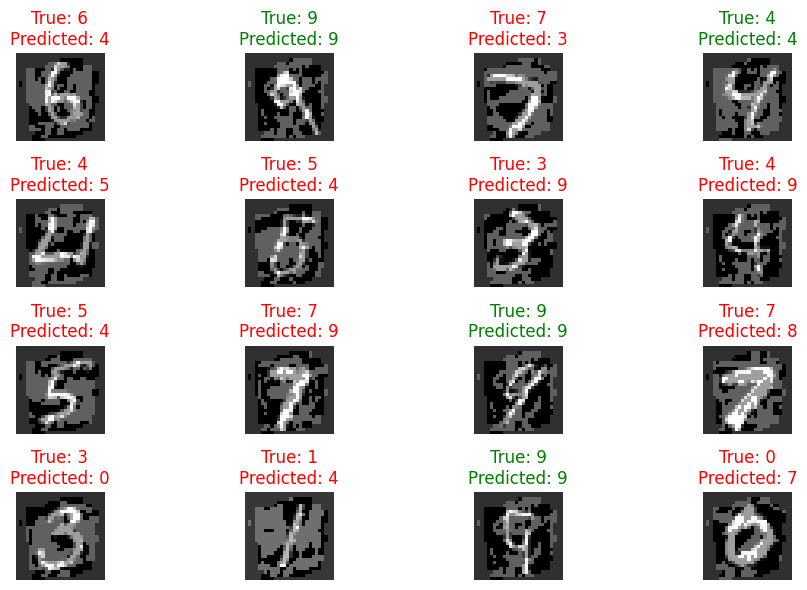

In [73]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 6))
random_index = np.random.randint(0, len(adv_test), 16)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(adv_test[random_index[i]].reshape(28, 28), cmap='gray')
    ax.axis('off')

    if y_test[random_index[i]] == adv_preds[random_index[i]]:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(
        f'True: {y_test[random_index[i]]}\nPredicted: {adv_preds[random_index[i]]}',
        color=color
    )

plt.tight_layout()
plt.show()